# Case study on unsupervised learning

## Try out different clustering models in the given dataset. Find the optimum number of clusters in each model and create the model with optimum number of clusters. Also learn about dB scan clustering and implement it.

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\illca\Downloads\Wine_clust.csv")

In [3]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [6]:
df.shape

(178, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [8]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

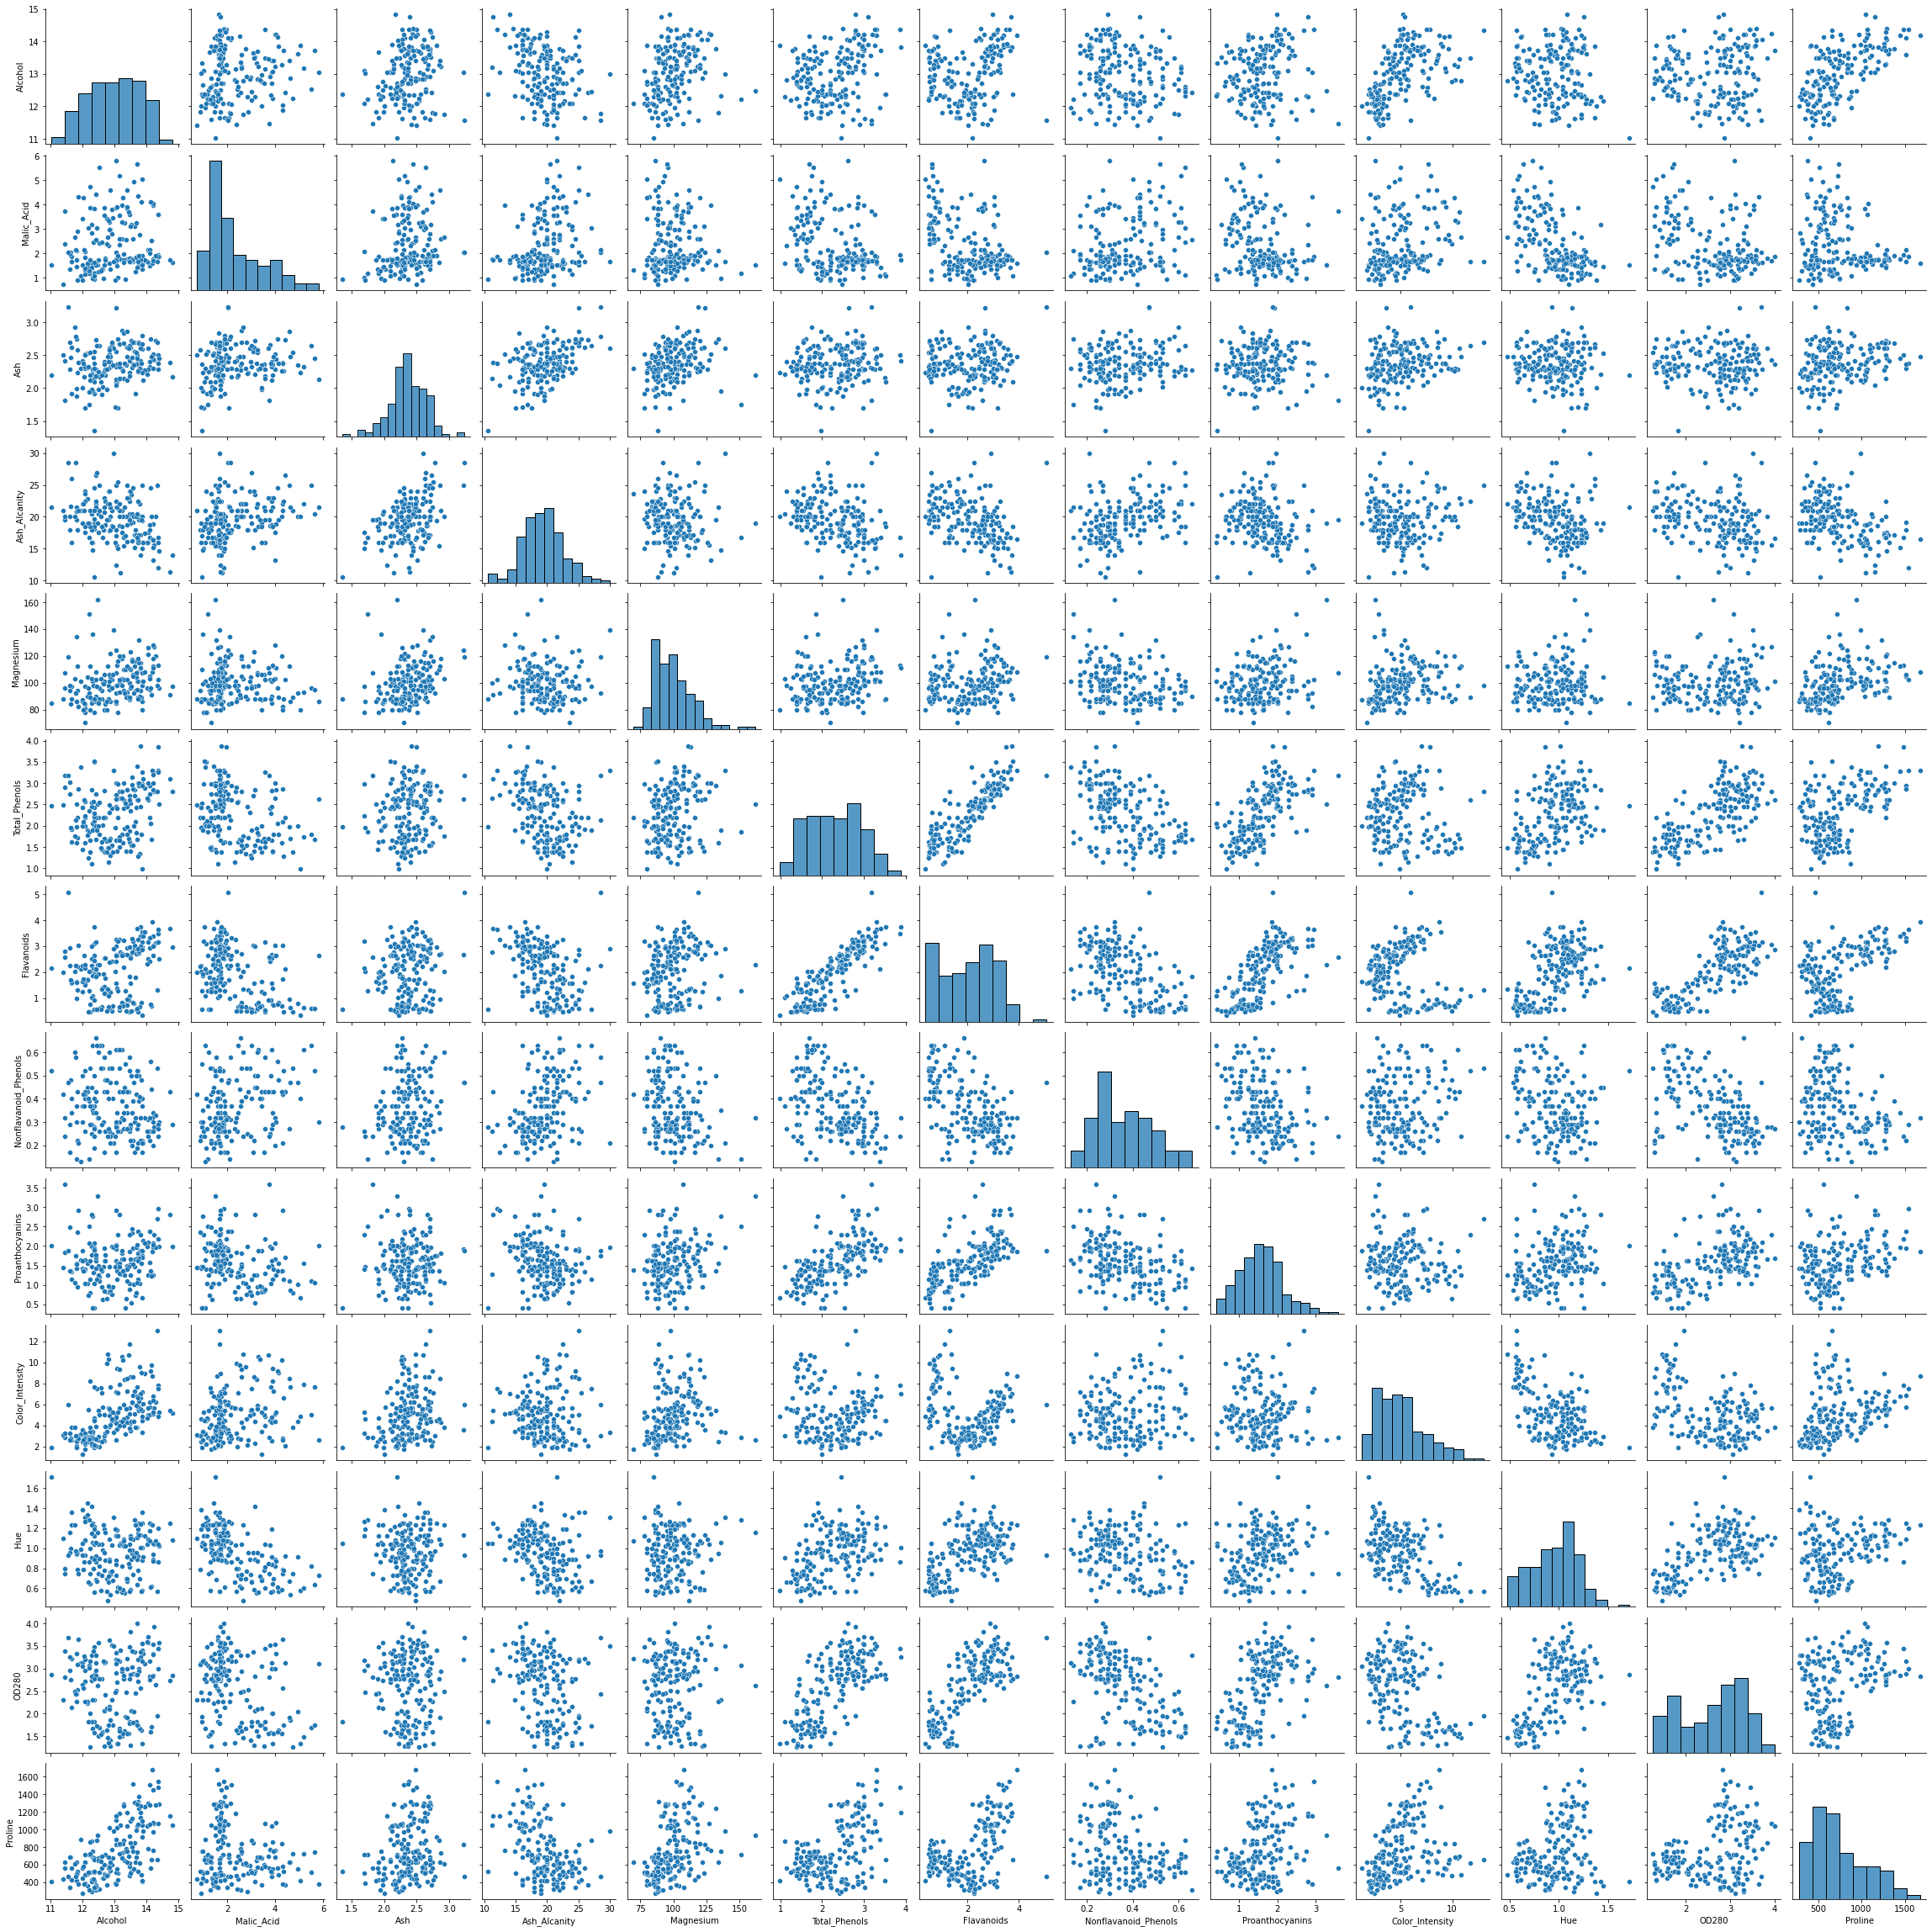

In [10]:
sns.pairplot(df)
plt.show()

In [11]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Normalizing data

In [12]:
from sklearn.preprocessing import Normalizer
data_norm= pd.DataFrame(Normalizer().fit_transform(df), columns=df.columns)


In [13]:
data_norm

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.018364,0.007568,0.003282,0.027460,0.127252,0.002250,0.000817,0.000697,0.001420,0.010314,0.000857,0.002331,0.991225
174,0.017691,0.005162,0.003274,0.030366,0.134666,0.002376,0.000990,0.000568,0.001862,0.009638,0.000924,0.002060,0.990194
175,0.015723,0.005071,0.002678,0.023697,0.142180,0.001884,0.000818,0.000509,0.001600,0.012085,0.000699,0.001848,0.989336
176,0.015514,0.003051,0.002792,0.023559,0.141355,0.001944,0.000801,0.000624,0.001720,0.010955,0.000707,0.001908,0.989482


### Standard scaling data

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_data = sc.fit_transform(df)
pd.DataFrame(scaled_data).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [15]:
scaled_data= pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

In [16]:
scaled_data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


# KMeans Clustering

# For normalised data

In [17]:
features_set=data_norm.iloc[:,0:13].values

In [18]:
features_set

array([[1.32644724e-02, 1.59397384e-03, 2.26512072e-03, ...,
        9.69434383e-04, 3.65402190e-03, 9.92738094e-01],
       [1.25128005e-02, 1.68733218e-03, 2.02859038e-03, ...,
        9.95336401e-04, 3.22299406e-03, 9.95336401e-01],
       [1.10630135e-02, 1.98394467e-03, 2.24454758e-03, ...,
        8.65874158e-04, 2.66487484e-03, 9.96175609e-01],
       ...,
       [1.57227449e-02, 5.07108879e-03, 2.67772446e-03, ...,
        6.99051960e-04, 1.84834078e-03, 9.89336248e-01],
       [1.55136606e-02, 3.05090212e-03, 2.79175213e-03, ...,
        7.06772691e-04, 1.90828627e-03, 9.89481768e-01],
       [2.48340486e-02, 7.20591644e-03, 4.81566123e-03, ...,
        1.07209976e-03, 2.81206495e-03, 9.84222734e-01]])

In [19]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init="k-means++",n_init=10,random_state=101)
    km.fit(features_set)
    wcss.append(km.inertia_)

C:\Users\illca\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
wcss

[0.5893776280459064,
 0.21097561296654618,
 0.10306150549665624,
 0.05910073413010722,
 0.03969232820057103,
 0.031229113729223223,
 0.02715690413975614,
 0.023328034703132886,
 0.020311864862968557,
 0.01852820217863078]

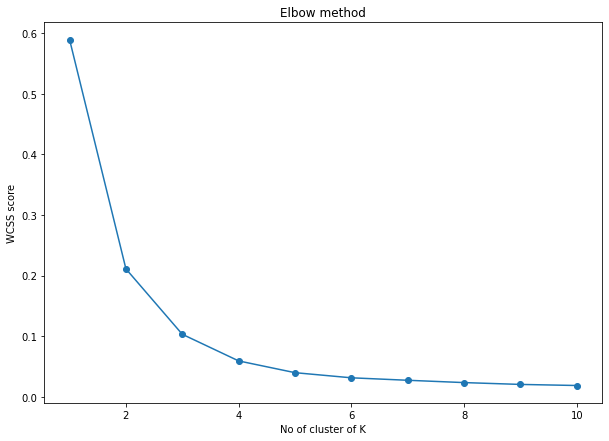

In [21]:
plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss,'-o')
plt.title("Elbow method")
plt.xlabel("No of cluster of K")
plt.ylabel("WCSS score")
plt.show()

### elbow point where there is a gradual decrease happening in inertia so here k=3 for normalized data.

In [22]:
km=KMeans(n_clusters=3,init="k-means++",n_init=10,random_state=101)
km.fit(features_set)
norm_pred= km.predict(features_set)
data_norm["km_3"]=km.labels_    

In [23]:
data_norm

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,km_3
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738,2
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336,2
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176,2
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961,2
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.018364,0.007568,0.003282,0.027460,0.127252,0.002250,0.000817,0.000697,0.001420,0.010314,0.000857,0.002331,0.991225,0
174,0.017691,0.005162,0.003274,0.030366,0.134666,0.002376,0.000990,0.000568,0.001862,0.009638,0.000924,0.002060,0.990194,0
175,0.015723,0.005071,0.002678,0.023697,0.142180,0.001884,0.000818,0.000509,0.001600,0.012085,0.000699,0.001848,0.989336,0
176,0.015514,0.003051,0.002792,0.023559,0.141355,0.001944,0.000801,0.000624,0.001720,0.010955,0.000707,0.001908,0.989482,0


In [24]:
norm_pred

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 2, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0,
       2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

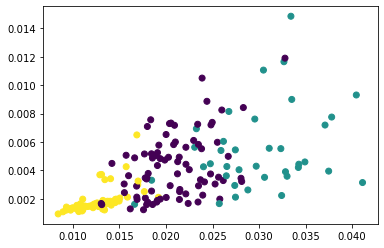

In [25]:
plt.scatter(data_norm.iloc[:,0],data_norm.iloc[:,1],c=norm_pred)

# K-mean For standard Sacaled data

In [26]:
features_set2=scaled_data.iloc[:,0:13].values

In [27]:
features_set2

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [28]:
wcss2=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init="k-means++",n_init=10,random_state=101)
    km.fit(features_set2)
    wcss2.append(km.inertia_)

C:\Users\illca\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
wcss2

[2314.0000000000005,
 1658.7588524290952,
 1277.928488844642,
 1180.3383153270845,
 1109.2925777554487,
 1044.7060044024402,
 989.4727831726524,
 936.2156041380945,
 892.9179275481517,
 860.8501673662386]

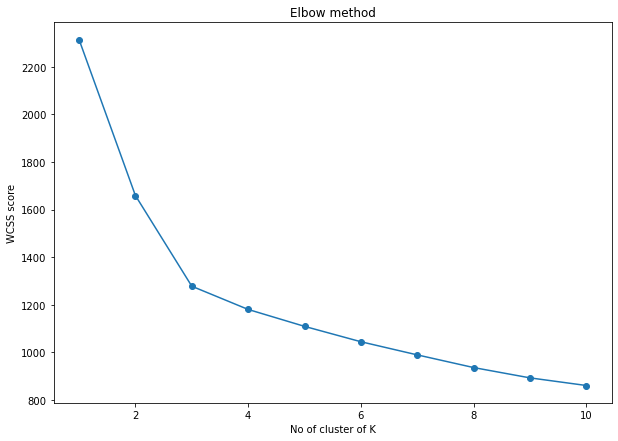

In [30]:
plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss2,'-o')
plt.title("Elbow method")
plt.xlabel("No of cluster of K")
plt.ylabel("WCSS score")
plt.show()

### elbow point where there is a gradual decrease happening in inertia so here k=3 for Standardised data.

In [31]:
km=KMeans(n_clusters=3,init="k-means++",n_init=10,random_state=101)
km.fit(features_set2)
Sc_pred= km.predict(features_set2)
scaled_data["km_3"]=km.labels_   

In [32]:
scaled_data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,km_3
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1


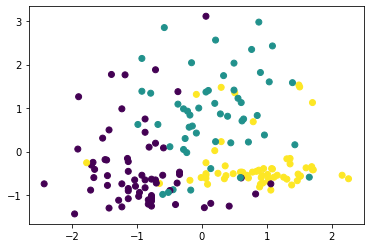

In [33]:
plt.scatter(scaled_data.iloc[:,0],scaled_data.iloc[:,1],c=Sc_pred)

In [34]:
from sklearn.metrics import silhouette_score


In [35]:
silhouette_norm= silhouette_score(features_set,norm_pred)
silhouette_sc= silhouette_score(features_set2,Sc_pred)

In [36]:
print(silhouette_norm)
print(silhouette_sc)

0.5233461282286352
0.2848589191898987


#### After comparing both the kmean models we can say that a Model created with normalized data is giving us a better result compared to a Standard scaled data.

In [37]:
from sklearn.manifold import TSNE
m=TSNE(n_components=2,verbose=1,perplexity=40)

tsne_features=m.fit_transform(features_set)



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 0.015946


C:\Users\illca\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\illca\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.625168
[t-SNE] KL divergence after 1000 iterations: 0.108698


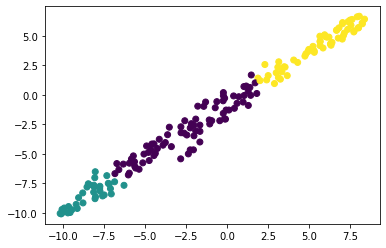

In [38]:
plt.scatter(tsne_features[:,0],tsne_features[:,1],c=data_norm["km_3"])

## Hierarchial clustering
## Agglomerative clustering

## for normalized data

In [39]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [40]:
new_norm=data_norm.drop("km_3",axis=1)

In [41]:
new_norm.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.019950,0.003711,0.003644,0.031124,0.151541,0.003444,0.002973,0.000581,0.002396,0.007342,0.001477,0.003993,0.986018
std,0.007321,0.002499,0.001409,0.014671,0.054081,0.001543,0.001802,0.000327,0.001249,0.003843,0.000736,0.001979,0.010073
min,0.008428,0.000944,0.001473,0.007739,0.064147,0.001255,0.000637,0.000145,0.000554,0.002241,0.000579,0.001675,0.951812
25%,0.013548,0.001684,0.002359,0.017615,0.109775,0.002385,0.001746,0.000277,0.001515,0.004612,0.000970,0.002535,0.981687
50%,0.018984,0.003174,0.003468,0.030036,0.146777,0.002946,0.002721,0.000514,0.002030,0.005981,0.001232,0.003384,0.988441
75%,0.024783,0.004981,0.004506,0.040010,0.183082,0.003886,0.003551,0.000833,0.003040,0.008853,0.001834,0.004870,0.993564
max,0.041106,0.014852,0.007305,0.069703,0.297958,0.008404,0.010560,0.002008,0.007469,0.021876,0.004727,0.010858,0.997835


In [42]:
mergings=linkage(new_norm,method="ward")

In [43]:
mergings.shape

(177, 4)

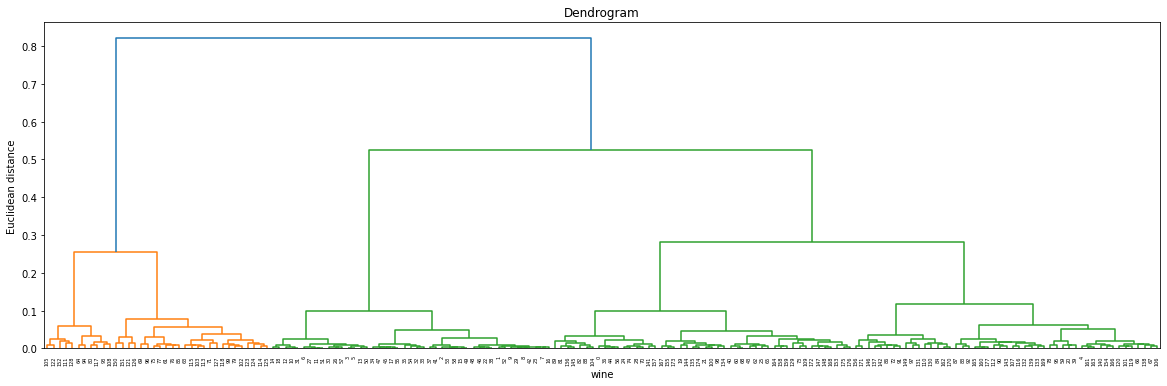

In [44]:
plt.figure(figsize=(20,6))
dendrogram(mergings,labels=new_norm.index,leaf_rotation=90)
plt.title("Dendrogram")
plt.xlabel('wine')
plt.ylabel('Euclidean distance')
plt.show()

#### For the Normalised data we can take 2 as the optimum number of clusters.

In [45]:
from scipy.cluster.hierarchy import fcluster

In [46]:
labels=fcluster(mergings,0.3,criterion="distance")

In [47]:
pd.Series(labels).value_counts()

3    97
2    45
1    36
dtype: int64

#  Agglomerative clustering for standard scaled data

In [48]:
sc_data=scaled_data.drop("km_3",axis=1)

In [49]:
sc_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [50]:
mergings2=linkage(sc_data,method="ward")

In [51]:
mergings2.shape

(177, 4)

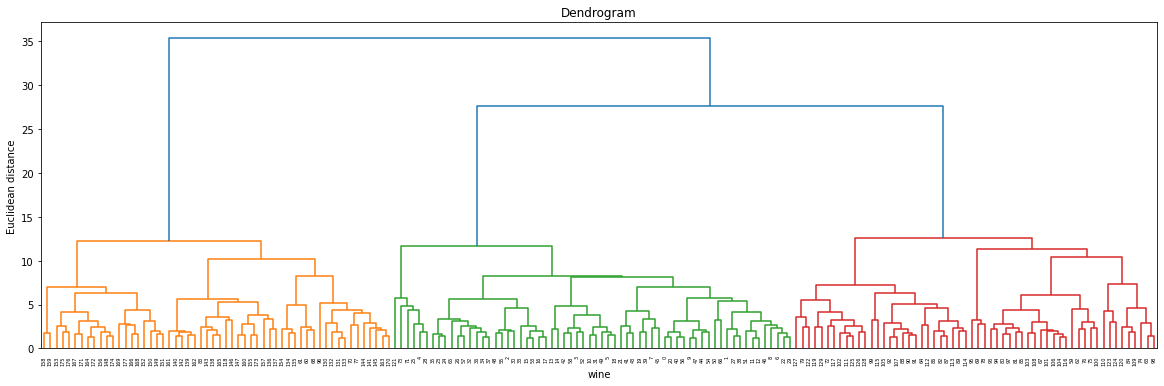

In [52]:
plt.figure(figsize=(20,6))
dendrogram(mergings2,labels=sc_data.index,leaf_rotation=90)
plt.title("Dendrogram")
plt.xlabel('wine')
plt.ylabel('Euclidean distance')
plt.show()

 #### For the standardised data we can take 3 as the optimum number of clusters.

In [53]:
from sklearn.cluster import AgglomerativeClustering

In [54]:
hc_n = AgglomerativeClustering(n_clusters = 2 , affinity = "euclidean" , linkage = "ward")
hc_s = AgglomerativeClustering(n_clusters = 3 , affinity = "euclidean" , linkage = "ward")

In [55]:
model_hc_norm = hc_n.fit_predict(new_norm)

In [56]:
model_hc_sc=hc_s.fit_predict(sc_data)

In [57]:
model_hc_norm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [58]:
model_hc_sc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [59]:
silhouette_norm2= silhouette_score(new_norm,model_hc_norm)
silhouette_sc2= silhouette_score(sc_data,model_hc_sc)

In [60]:
print(silhouette_norm)
print(silhouette_sc)

0.5233461282286352
0.2848589191898987


#### After comparing both the AHC models we can say that a Model created with normalized data is giving us a better result compared to a Standard scaled data.

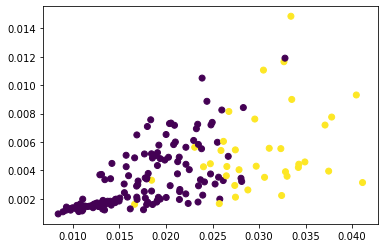

In [61]:
plt.scatter(new_norm.iloc[:,0],new_norm.iloc[:,1],c=model_hc_norm)

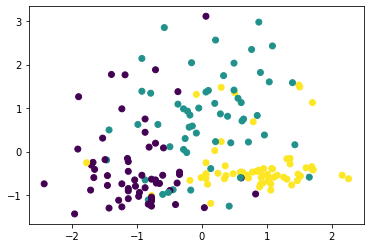

In [62]:
plt.scatter(sc_data.iloc[:,0],sc_data.iloc[:,1],c=model_hc_sc)

### Next performing PCA on the data to see if it can improve the performance

In [63]:
from sklearn.decomposition import PCA 

### for normalized data

In [64]:
pc=PCA(n_components=2)
pc_array=pc.fit_transform(new_norm)

In [65]:
pc_array.shape

(178, 2)

In [66]:
pc.explained_variance_ratio_

array([0.97728831, 0.01342272])

#### PCA in kmeans for norm

In [67]:
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(pc_array)
pred_pca = kmeans_pca.predict(pc_array)

print(pred_pca)

[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 1 1 2 2 2 2 1 0 1 2 2
 0 1 1 1 2 1 1 0 2 2 2 1 2 2 0 0 2 2 2 1 1 2 1 2 2 1 2 2 1 1 2 1 2 2 1 2 2
 1 2 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2
 2 1 1 1 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [68]:
silhouette_norm_pca= silhouette_score(new_norm,pred_pca)

In [69]:
silhouette_norm_pca

0.5233461282286352

Text(0.5, 1.0, 'Scatter Plot to show Clusters')

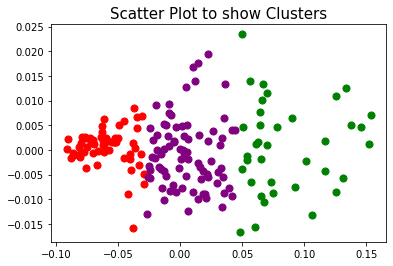

In [70]:
plt.scatter(pc_array[pred_pca == 0,0],pc_array[pred_pca == 0,1],s=50,c='red',label='')
plt.scatter(pc_array[pred_pca == 1,0],pc_array[pred_pca == 1,1],s=50,c='green',label='Cluster: 2')
plt.scatter(pc_array[pred_pca== 2,0],pc_array[pred_pca == 2,1],s=50,c='purple',label='Cluster: 3')
plt.title("Scatter Plot to show Clusters",fontsize=15)

### fro standardised data

#### PCA in Kmeans For SC

In [71]:
pc2=PCA(n_components=2)
pc_array2=pc.fit_transform(sc_data)

In [72]:
pc_array2.shape

(178, 2)

In [73]:
pc.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [74]:
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(pc_array2)
pred_pca = kmeans_pca.predict(pc_array2)

print(pred_pca)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [75]:
silhouette_sc_pca= silhouette_score(sc_data,pred_pca)

In [76]:
silhouette_sc_pca

0.2831143774741039

### Agglomerative Clustering with PCA for norm data

In [77]:
mergings=linkage(pc_array,method="ward")

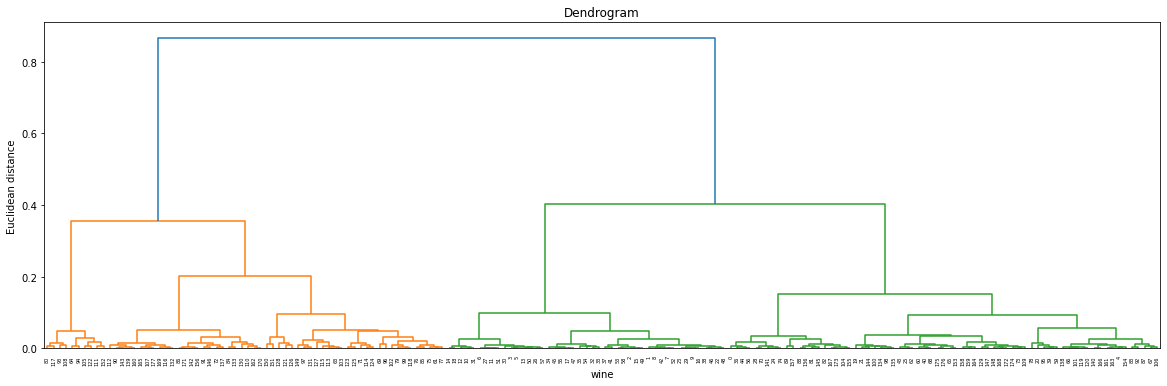

In [78]:
plt.figure(figsize=(20,6))
dendrogram(linkage(pc_array,method="ward"))
plt.title("Dendrogram")
plt.xlabel('wine')
plt.ylabel('Euclidean distance')
plt.show()

In [79]:
hc_n = AgglomerativeClustering(n_clusters = 2 , affinity = "euclidean" , linkage = "ward")

In [80]:
model_hc_norm_pca = hc_n.fit_predict(pc_array)

In [81]:
model_hc_norm_pca

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [82]:
silhouette_norm_alg= silhouette_score(pc_array,model_hc_norm_pca)

In [83]:
silhouette_norm_alg

0.5461320282173209

### Agglomerative Clustering with PCA for standard data

In [84]:
mergings2=linkage(pc_array2,method="ward")

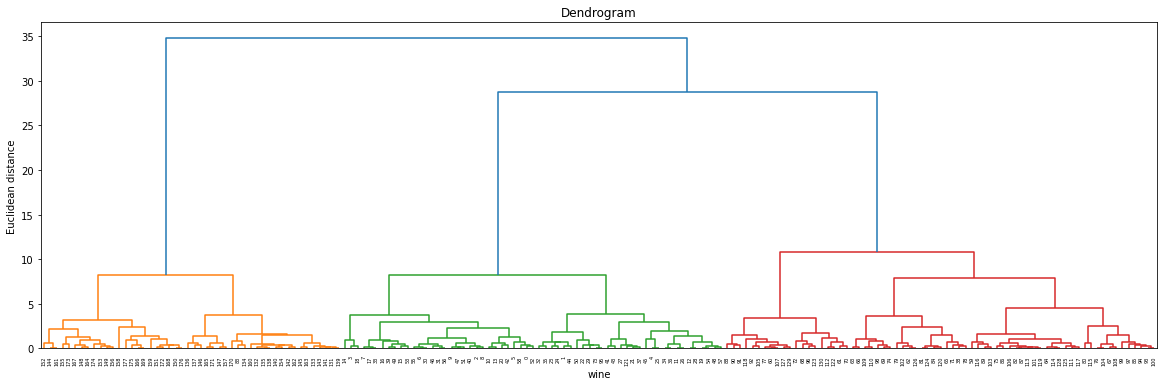

In [85]:
plt.figure(figsize=(20,6))
dendrogram(mergings2)
plt.title("Dendrogram")
plt.xlabel('wine')
plt.ylabel('Euclidean distance')
plt.show()

In [86]:
hc_s = AgglomerativeClustering(n_clusters = 3 , affinity = "euclidean" , linkage = "ward")

In [87]:
model_hc_sc = hc_n.fit_predict(pc_array2)

In [88]:
model_hc_sc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [89]:
silhouette_sc_alg= silhouette_score(pc_array2,model_hc_sc)

In [90]:
silhouette_sc_alg

0.473592307956352

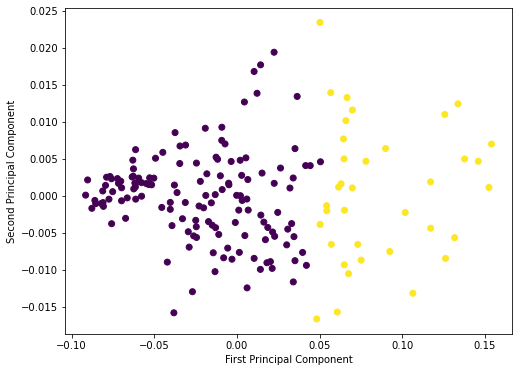

In [91]:
plt.figure(figsize =(8, 6))
plt.scatter(pc_array[:, 0], pc_array[:, 1], c =model_hc_norm)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

#### after doing with pca we got the model score for normalized data i same.

In [92]:
print("Normalised",silhouette_norm)
print("Standardised",silhouette_sc)
print("Normalised algo",silhouette_norm2)
print("Standardised algo",silhouette_sc2)
print("Normalised with pca",silhouette_norm_pca)
print("Standardised with pca",silhouette_sc_pca)
print("Normalised algo with pca",silhouette_norm_alg)
print("Standardised algo with pca",silhouette_sc_alg)

Normalised 0.5233461282286352
Standardised 0.2848589191898987
Normalised algo 0.5365826498495794
Standardised algo 0.2774439826952265
Normalised with pca 0.5233461282286352
Standardised with pca 0.2831143774741039
Normalised algo with pca 0.5461320282173209
Standardised algo with pca 0.473592307956352


### Conclusion :
#### After comparing both our models we can say that the Agglomerative Hierarchical Clustering model (Normalized) is giving a slightly higher performance score than the K-Means model (After PCA) at identifying Clusters. The Silhouette score for the Models were as given below :
#### a) KMeans Model (After PCA with n=3 ) =0.5233461282286352,
#### b) AHC Model (After PCA with n=2) = 0.5461320282173209

### DB scan clustering for norm data

In [93]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn import metrics

In [94]:
#DBSCAN algorithm
#DBSCAN stands for density-based spatial clustering of applications with noise. It is able to find arbitrary shaped clusters and clusters with noise (i.e. outliers).

#The main idea behind DBSCAN is that a point belongs to a cluster if it is close to many points from that cluster.

In [95]:
data_norm, y_true = make_blobs(n_samples=300, centers=4,cluster_std=0.50, random_state=43)
db = DBSCAN(eps=0.3, min_samples=10).fit(data_norm)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [96]:
labels 

array([ 0, -1, -1, -1,  1,  0, -1, -1,  0,  0,  1,  3,  3,  1, -1,  2, -1,
       -1,  3, -1,  0,  0,  3,  0,  3,  0,  1, -1,  2,  0,  1, -1, -1, -1,
       -1,  2, -1, -1, -1,  1, -1, -1,  2,  2,  1, -1, -1,  3, -1, -1,  1,
        1, -1,  0,  0, -1,  2,  3, -1, -1,  0, -1,  3,  2, -1,  0,  2,  3,
        3,  2,  1,  0, -1,  3, -1, -1,  3,  3, -1,  3,  3,  3,  2,  0,  2,
        1,  1,  3,  2,  3,  3,  2,  2,  3,  1,  1,  1, -1, -1,  2, -1, -1,
        2, -1, -1, -1,  3,  0, -1, -1, -1,  1, -1,  2, -1,  0,  3,  1, -1,
        1,  2, -1, -1,  0,  3,  1,  1,  1,  2, -1,  3,  0, -1,  2, -1, -1,
       -1, -1,  0,  1,  1, -1, -1,  3,  2,  3,  3, -1,  1, -1,  0,  2, -1,
       -1, -1, -1,  0,  3,  1, -1, -1,  3, -1,  1,  0,  3,  2,  0,  2,  3,
        2,  2, -1,  0,  0, -1, -1,  1,  1,  2, -1,  1,  3, -1, -1,  0,  0,
        3, -1,  2,  1,  3,  3, -1,  2, -1, -1, -1, -1, -1, -1,  0,  2,  1,
        3,  1, -1, -1,  0,  0,  1,  3,  1, -1,  1, -1,  3, -1,  3, -1,  1,
        0,  1,  3,  0,  2

In [97]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  
print(labels)

[ 0 -1 -1 -1  1  0 -1 -1  0  0  1  3  3  1 -1  2 -1 -1  3 -1  0  0  3  0
  3  0  1 -1  2  0  1 -1 -1 -1 -1  2 -1 -1 -1  1 -1 -1  2  2  1 -1 -1  3
 -1 -1  1  1 -1  0  0 -1  2  3 -1 -1  0 -1  3  2 -1  0  2  3  3  2  1  0
 -1  3 -1 -1  3  3 -1  3  3  3  2  0  2  1  1  3  2  3  3  2  2  3  1  1
  1 -1 -1  2 -1 -1  2 -1 -1 -1  3  0 -1 -1 -1  1 -1  2 -1  0  3  1 -1  1
  2 -1 -1  0  3  1  1  1  2 -1  3  0 -1  2 -1 -1 -1 -1  0  1  1 -1 -1  3
  2  3  3 -1  1 -1  0  2 -1 -1 -1 -1  0  3  1 -1 -1  3 -1  1  0  3  2  0
  2  3  2  2 -1  0  0 -1 -1  1  1  2 -1  1  3 -1 -1  0  0  3 -1  2  1  3
  3 -1  2 -1 -1 -1 -1 -1 -1  0  2  1  3  1 -1 -1  0  0  1  3  1 -1  1 -1
  3 -1  3 -1  1  0  1  3  0  2  2  1 -1 -1  0 -1  1 -1  1  2 -1 -1  0  0
 -1  3 -1  3 -1 -1  3  3 -1 -1  0  1  3 -1 -1 -1  3  3  2  3  3 -1  2  3
  3 -1 -1 -1 -1  0 -1 -1  2  1  2 -1  3 -1 -1 -1  1 -1 -1 -1 -1  1 -1  2
  2 -1  3 -1  0  0 -1  3  3 -1  3  0]


['y', 'b', 'g', 'r']


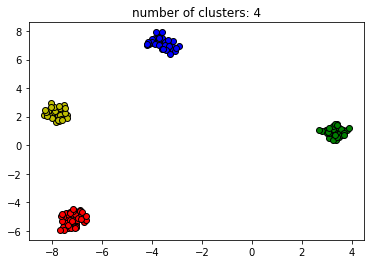

Silhouette Coefficient:0.21


In [98]:
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
  
    class_member_mask = (labels == k)
    xy = data_norm[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
    xy = data_norm[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
plt.title('number of clusters: %d' % n_clusters_)
plt.show()
  
#evaluation metrics
sc = metrics.silhouette_score(data_norm,labels)
print("Silhouette Coefficient:%0.2f"%sc)

### DB scan clustering for standard data

In [99]:
sc_data, y_true = make_blobs(n_samples=300, centers=4,cluster_std=0.50, random_state=43)
db = DBSCAN(eps=0.3, min_samples=10).fit(sc_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels2 = db.labels_

['y', 'b', 'g', 'r']


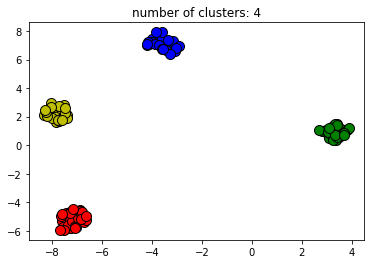

Silhouette Coefficient:0.21


In [100]:
unique_labels2 = set(labels2)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
  
    class_member_mask = (labels == k)
    xy = sc_data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=10)
  
    xy = sc_data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=10)
plt.title('number of clusters: %d' % n_clusters_)
plt.show()
  
#evaluation metrics
sc = metrics.silhouette_score(data_norm,labels)
print("Silhouette Coefficient:%0.2f"%sc)

### The End.